In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


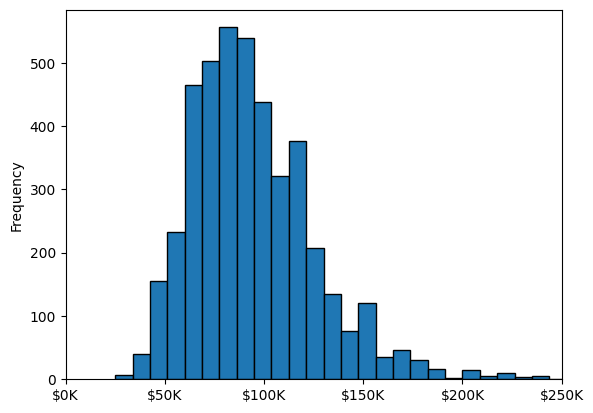

In [14]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0,250000)
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

(0.0, 150.0)

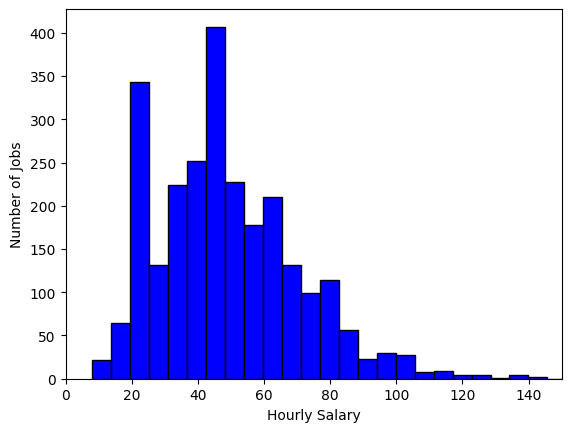

In [19]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS['salary_hour_avg'].plot(
    kind='hist',
    bins = 40,
    color = 'blue',
    edgecolor = 'black'
)
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0,150)

<Axes: xlabel='Number of Skills', ylabel='Number of Job Postings'>

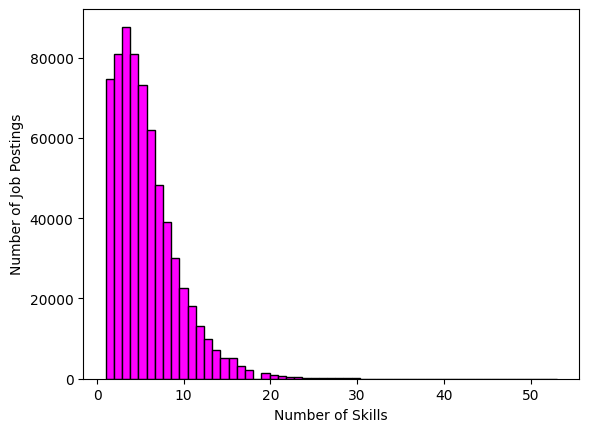

In [28]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['skill_num'] = df_skills['job_skills'].apply(len) 
df_skills['skill_num'].plot(
    kind= 'hist',
    bins =  55,
    color = 'magenta',
    edgecolor = 'black',
    xlabel = 'Number of Skills',
    ylabel = 'Number of Job Postings'
)

In [33]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

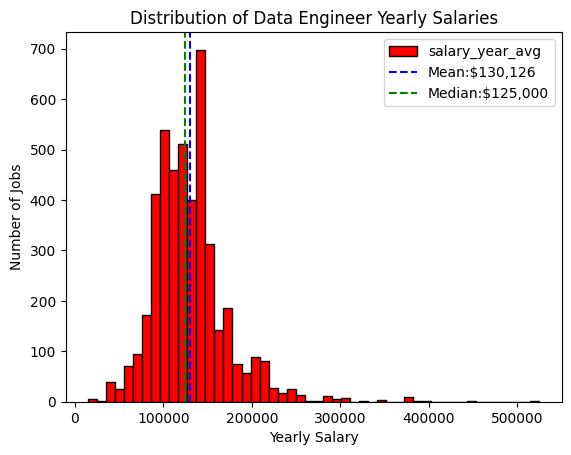

In [40]:
df_DE['salary_year_avg'].plot(
    kind = 'hist',
    bins = 50,
    color = 'red',
    edgecolor = 'black'
)
plt.axvline(mean_salary, color = 'blue', linestyle = 'dashed', label = f'Mean:${mean_salary:,.0f}')
plt.axvline(median_salary, color = 'green', linestyle = 'dashed', label = f'Median:${median_salary:,.0f}')
plt.legend()
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.show()